<a href="https://colab.research.google.com/github/JosegSuarezb/Integracion-III/blob/main/1_Caracterizacion_VA_Clase.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Caracterizacion experimental de variables**

0. Cargar las librerias de trabajo

In [ ]:
import numpy as np #funciones numericas
import pandas as pd #comunicacion con el excel
import matplotlib.pyplot as plt
import seaborn as sns #Libreria para la grafica de distribuciones

#para carga automatica de los datos
from google.colab import drive  #cargar datos desde el drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


1. se procede con la carga de los datos

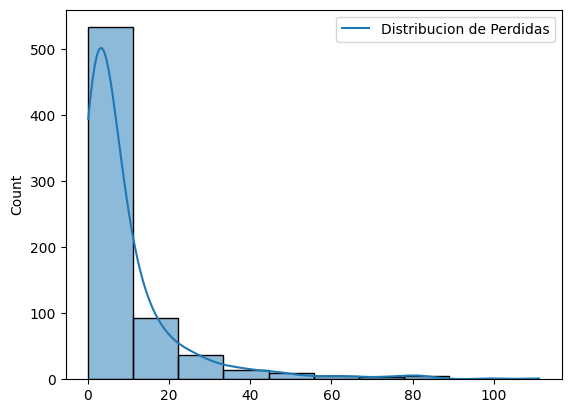

In [ ]:
nxl='/content/drive/MyDrive/Integracion de datos (enfasis)/3. FallasTecnologicas (1).xlsx'
XDB=pd.read_excel(nxl,sheet_name=0)
XDB.head(100) #mostrar los primero 100 datos

#Tomamos las variables de interes
Xev=XDB.iloc[:,3] #Variable eventos semanales
Xsev=XDB.iloc[:,4] #perdidas promedio por evento
LDA=np.multiply(Xev,Xsev)

#graficamos la distribucion de las perdidas
plt.figure()
sns.histplot(LDA, kde=True, bins=10)
#bins agrupar los datos en 10 intervalos
plt.legend(['Distribucion de Perdidas'])
plt.show()


2. Caracterizacion de la distribucion de las perdidas

In [ ]:
counts,bin_edges=np.histogram(LDA,bins=10)
print('Los datos por intervalo son:\n',counts) #cuantos datos hay por intervalo
print('Los limites de los intervalos son:\n',bin_edges) #limites de los intervalos

#Los valores centrales - marcas de clase
mc=(bin_edges[:-1]+bin_edges[1:])/2
#limites inferiore bin_edges[:-1]
#limites superiores bin_edges[1:]
print('Los valores centrales de las clases son:\n',mc)

#cuantos datos hay por intervalo %
fp=counts/sum(counts)
print('Los datos por intervalo son:\n', fp)

#2. se procede con el calculo de las medidas de tendencia central
#Media, Varianza, coeficiente de asimetria, kurtosis
u=np.sum(np.multiply(mc,fp))
print('la media de los datos es:\n',u)

#3. Desviacion - Estandar (Varianza)
var=np.sum(np.multiply((mc-u)**2,fp)) #suma producto del excel
std=np.sqrt(var)
print('La desviacion estandar de los datos es:\n', std)

#4. Coeficiente de asimetria
cas=np.sum(np.multiply(((mc-u)/std)**3,fp))
print('El coeficiente de asimetria de los datos es:\n', cas)

#5. coeficiente de kurtosis
ck=np.sum(np.multiply(((mc-u)/std)**4,fp))
ck=ck-3
print('El coeficiente de kurtosis de los datos es:', ck)

Los datos por intervalo son:
 [533  93  37  14   9   5   3   5   1   1]
Los limites de los intervalos son:
 [  0.1423   11.23637  22.33044  33.42451  44.51858  55.61265  66.70672
  77.80079  88.89486  99.98893 111.083  ]
Los valores centrales de las clases son:
 [  5.689335  16.783405  27.877475  38.971545  50.065615  61.159685
  72.253755  83.347825  94.441895 105.535965]
Los datos por intervalo son:
 [0.76034237 0.13266762 0.05278174 0.01997147 0.0128388  0.00713267
 0.0042796  0.00713267 0.00142653 0.00142653]
la media de los datos es:
 11.07019634094151
La desviacion estandar de los datos es:
 13.044113210589247
El coeficiente de asimetria de los datos es:
 3.58241551867726
El coeficiente de kurtosis de los datos es: 15.266617247076208


**Analisis de Resultados**
En la base de datos se cuenta con un total de 701 registros de eventos de perdida asociados con las operaciones a traves de canales electronicos de una FINTECH. Estos registros nos arrojan como resultado una confiabilidad en la estimacion de los estadísticos del 99% de acuerdo con la teoria de los percentiles. En la grafica anterior podemos observar que la distribución presenta estructura de cola larga, esto promovido por un coeficiente de asimetria positivo aproximadamente de 3.348, y un coeficiente de kurtosis aproximadamente de 15 unidades, lo que indica que la mayoría de los datos se encuentran muy concentrados alrededor de la media, en un 76% aproximadamente. Esta estructura muestra claramente que los eventos de pérdida extremos por muy escasos, lo que indica una baja exposicion al riesgo.